In [1]:
from astropy.constants import R_sun, L_sun, sigma_sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_AllParameters = pd.read_csv('../tables/results/ALLPARAMETERS.csv')

<font color='yellow' size=5> Plots </font>

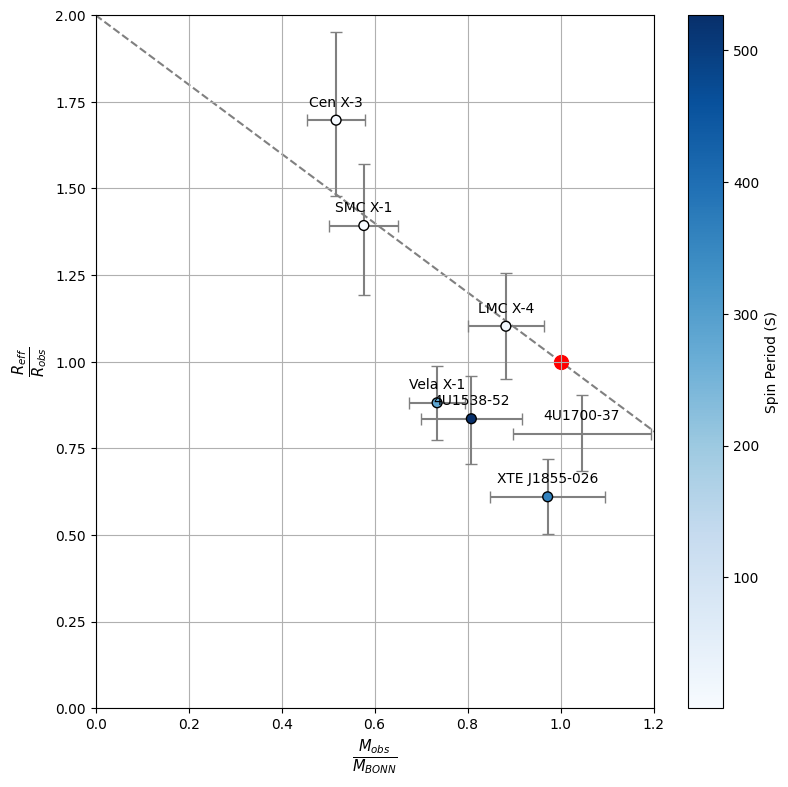

In [3]:
R_asymmetric_err = [df_AllParameters['R_expected/R_true_err_low'].tolist(), df_AllParameters['R_expected/R_true_err_high'].tolist()]
plt.figure(figsize=(9,9))
plt.errorbar(df_AllParameters["M_opt/M_exp"], df_AllParameters["R_expected/R_true"], yerr=R_asymmetric_err, xerr=df_AllParameters["M_opt/M_exp_err"], fmt='none', ecolor='gray', capsize=4, zorder=2)
plt.scatter(df_AllParameters["M_opt/M_exp"], df_AllParameters["R_expected/R_true"], c=df_AllParameters['P_spin'].tolist(), cmap='Blues', edgecolors='black', s=50, zorder=3)
plt.colorbar(label='Spin Period (S)')  # Add color bar with label
plt.plot([0, 2], [2, 0], linestyle='--', color='grey', zorder=1)
plt.scatter(1, 1, s=100, color='red')
# Add labels to each point
for i, label in enumerate(df_AllParameters["id"].tolist()):
    plt.annotate(label, (df_AllParameters["M_opt/M_exp"].tolist()[i], df_AllParameters["R_expected/R_true"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.ylim(0, 2)
plt.xlim(0, 1.2)
plt.grid(True)
plt.xlabel(r"$\frac{M_{obs}}{M_{BONN}}$", fontsize=15)
plt.ylabel(r"$\frac{R_{eff}}{R_{obs}}$", fontsize=15)
plt.show()

##### Roche lobe radius vs X-ray Luminosity

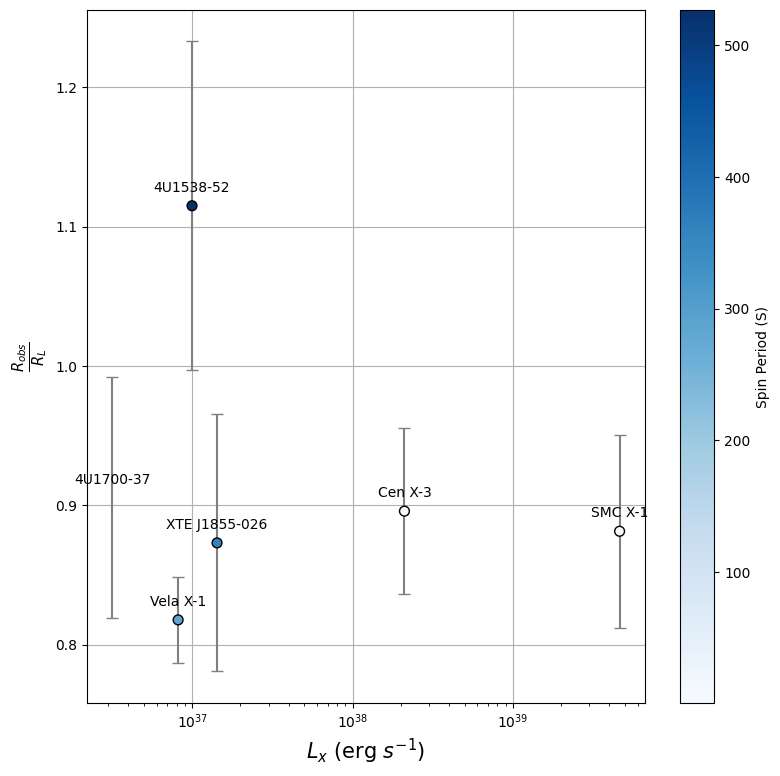

In [4]:
plt.figure(figsize=(9,9))
plt.errorbar(df_AllParameters['L_x'], df_AllParameters["R_true/RL_fal"], yerr=df_AllParameters['R_true/RL_fal_err'], fmt='none', ecolor='gray', capsize=4, zorder=2)
plt.scatter(df_AllParameters['L_x'], df_AllParameters["R_true/RL_fal"], c=df_AllParameters['P_spin'].tolist(), cmap='Blues', edgecolors='black', s=50, zorder=3)
plt.colorbar(label='Spin Period (S)')  # Add color bar with label
# plt.scatter(1, 1, s=100, color='red')
# Add labels to each point
for i, label in enumerate(df_AllParameters["id"].tolist()):
    plt.annotate(label, (df_AllParameters['L_x'].tolist()[i], df_AllParameters["R_true/RL_fal"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')
# plt.ylim(0.75, 1.3)
# plt.xlim(0, 1.2)
plt.xscale('log')
plt.grid(True)
plt.xlabel(r"$L_{x}$ (erg $s^{-1}$)", fontsize=15)
plt.ylabel(r"$\frac{R_{obs}}{R_{L}}$", fontsize=15)
plt.show()

For falange RL radius

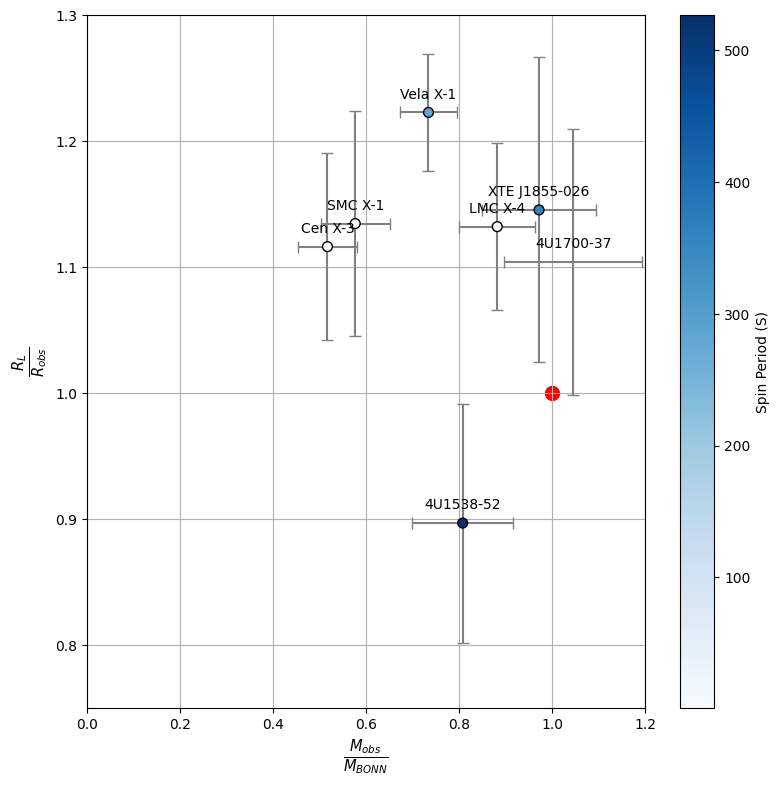

In [5]:
plt.figure(figsize=(9,9))
plt.errorbar(df_AllParameters["M_opt/M_exp"], df_AllParameters["RL_fal/R_true"], yerr=df_AllParameters['RL_fal/R_true_err'], xerr=df_AllParameters["M_opt/M_exp_err"], fmt='none', ecolor='gray', capsize=4, zorder=2)
plt.scatter(df_AllParameters["M_opt/M_exp"], df_AllParameters["RL_fal/R_true"], c=df_AllParameters['P_spin'].tolist(), cmap='Blues', edgecolors='black', s=50, zorder=3)
plt.colorbar(label='Spin Period (S)')  # Add color bar with label
plt.scatter(1, 1, s=100, color='red')
# Add labels to each point
for i, label in enumerate(df_AllParameters["id"].tolist()):
    plt.annotate(label, (df_AllParameters["M_opt/M_exp"].tolist()[i], df_AllParameters["RL_fal/R_true"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.ylim(0.75, 1.3)
plt.xlim(0, 1.2)
plt.grid(True)
plt.xlabel(r"$\frac{M_{obs}}{M_{BONN}}$", fontsize=15)
plt.ylabel(r"$\frac{R_{L}}{R_{obs}}$", fontsize=15)
plt.show()

Plot $R_{obs}/R_{L(falenga)}$ vs $M_{obs}/M_{BONN}$.

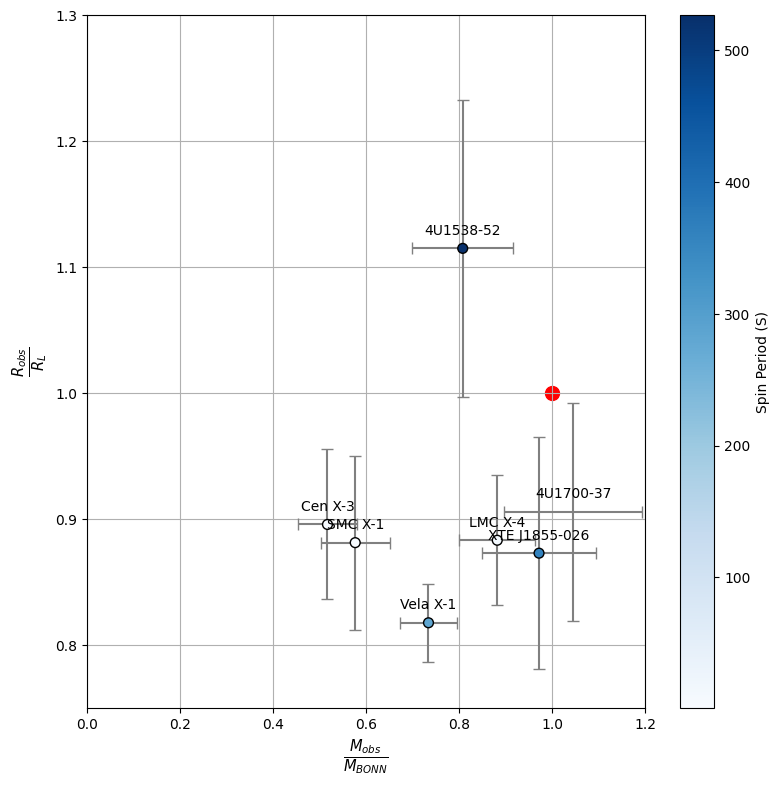

In [6]:
plt.figure(figsize=(9,9))
plt.errorbar(df_AllParameters["M_opt/M_exp"], df_AllParameters["R_true/RL_fal"], yerr=df_AllParameters['R_true/RL_fal_err'], xerr=df_AllParameters["M_opt/M_exp_err"], fmt='none', ecolor='gray', capsize=4, zorder=2)
plt.scatter(df_AllParameters["M_opt/M_exp"], df_AllParameters["R_true/RL_fal"], c=df_AllParameters['P_spin'].tolist(), cmap='Blues', edgecolors='black', s=50, zorder=3)
plt.colorbar(label='Spin Period (S)')  # Add color bar with label
plt.scatter(1, 1, s=100, color='red')
# Add labels to each point
for i, label in enumerate(df_AllParameters["id"].tolist()):
    plt.annotate(label, (df_AllParameters["M_opt/M_exp"].tolist()[i], df_AllParameters["R_true/RL_fal"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.ylim(0.75, 1.3)
plt.xlim(0, 1.2)
plt.grid(True)
plt.xlabel(r"$\frac{M_{obs}}{M_{BONN}}$", fontsize=15)
plt.ylabel(r"$\frac{R_{obs}}{R_{L}}$", fontsize=15)
plt.show()

For calc. RL radius with q

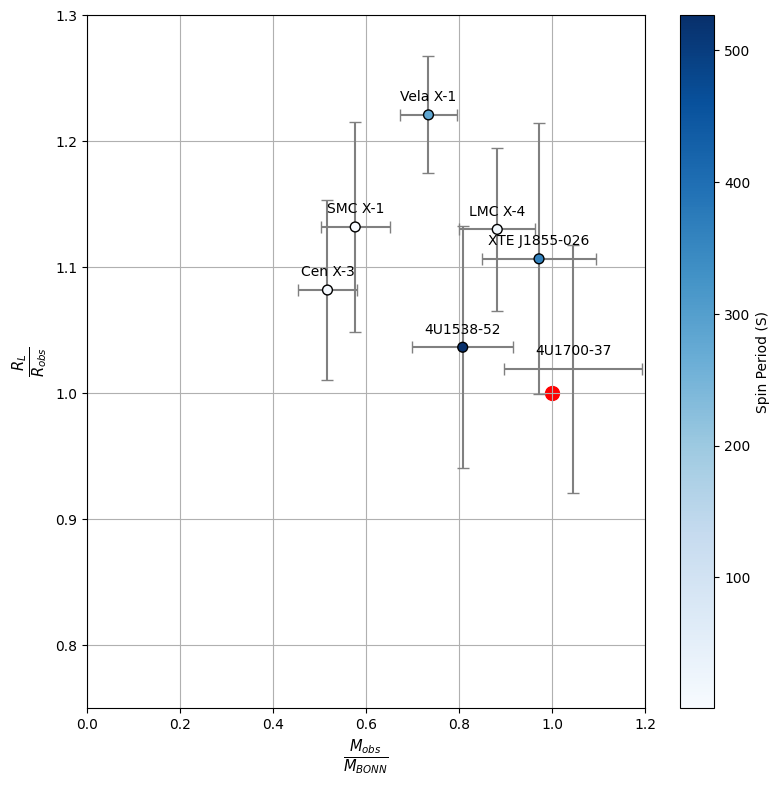

In [7]:
plt.figure(figsize=(9,9))
plt.errorbar(df_AllParameters["M_opt/M_exp"], df_AllParameters["RL_q/R_true"], yerr=df_AllParameters['RL_q/R_true_err'], xerr=df_AllParameters["M_opt/M_exp_err"], fmt='none', ecolor='gray', capsize=4, zorder=2)
plt.scatter(df_AllParameters["M_opt/M_exp"], df_AllParameters["RL_q/R_true"], c=df_AllParameters['P_spin'].tolist(), cmap='Blues', edgecolors='black', s=50, zorder=3)
plt.colorbar(label='Spin Period (S)')  # Add color bar with label
plt.scatter(1, 1, s=100, color='red')
# Add labels to each point
for i, label in enumerate(df_AllParameters["id"].tolist()):
    plt.annotate(label, (df_AllParameters["M_opt/M_exp"].tolist()[i], df_AllParameters["RL_q/R_true"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.ylim(0.75, 1.3)
plt.xlim(0, 1.2)
plt.grid(True)
plt.xlabel(r"$\frac{M_{obs}}{M_{BONN}}$", fontsize=15)
plt.ylabel(r"$\frac{R_{L}}{R_{obs}}$", fontsize=15)
plt.show()

RL/Rtrue vs Rexp/Rtrue

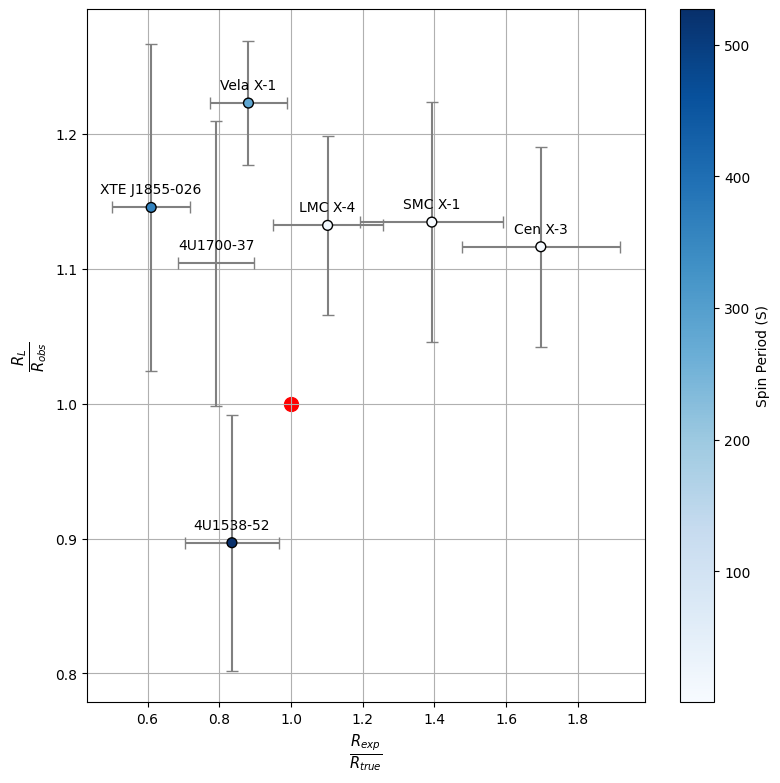

In [8]:
plt.figure(figsize=(9,9))
plt.errorbar(df_AllParameters["R_expected/R_true"], df_AllParameters["RL_fal/R_true"], yerr=df_AllParameters['RL_fal/R_true_err'], xerr=df_AllParameters["R_expected/R_true_err_low"], fmt='none', ecolor='gray', capsize=4, zorder=2)
plt.scatter(df_AllParameters["R_expected/R_true"], df_AllParameters["RL_fal/R_true"], c=df_AllParameters['P_spin'].tolist(), cmap='Blues', edgecolors='black', s=50, zorder=3)
plt.colorbar(label='Spin Period (S)')  # Add color bar with label
plt.scatter(1, 1, s=100, color='red')
# Add labels to each point
for i, label in enumerate(df_AllParameters["id"].tolist()):
    plt.annotate(label, (df_AllParameters["R_expected/R_true"].tolist()[i], df_AllParameters["RL_fal/R_true"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')
# plt.ylim(0.75, 1.3)
# plt.xlim(0, 1.2)
plt.grid(True)
plt.xlabel(r"$\frac{R_{exp}}{R_{true}}$", fontsize=15)
plt.ylabel(r"$\frac{R_{L}}{R_{obs}}$", fontsize=15)
plt.show()

For calc. RL radius with g

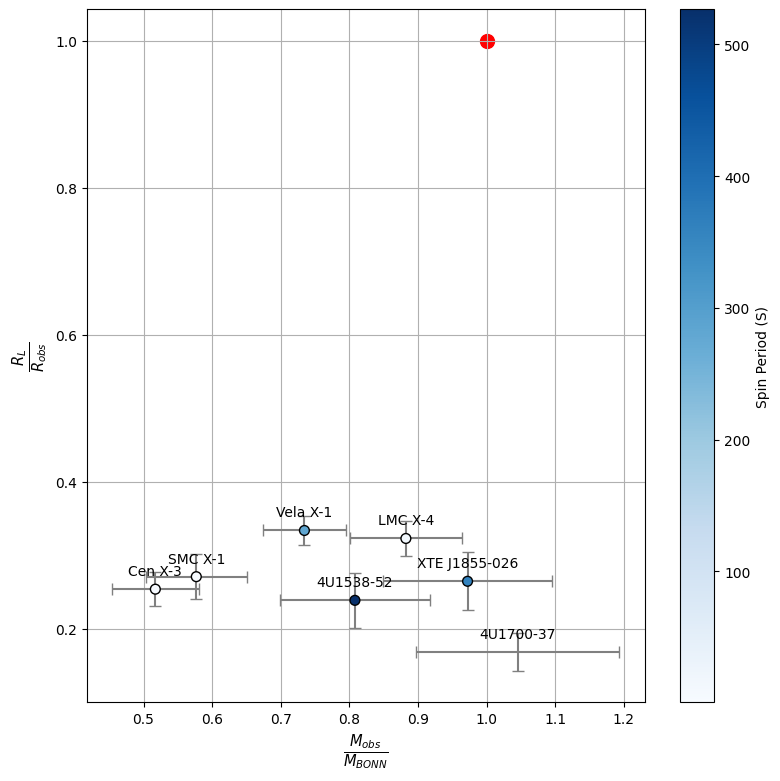

In [9]:
plt.figure(figsize=(9,9))
plt.errorbar(df_AllParameters["M_opt/M_exp"], df_AllParameters["RL_g/R_true"], yerr=df_AllParameters['RL_g/R_true_err'], xerr=df_AllParameters["M_opt/M_exp_err"], fmt='none', ecolor='gray', capsize=4, zorder=2)
plt.scatter(df_AllParameters["M_opt/M_exp"], df_AllParameters["RL_g/R_true"], c=df_AllParameters['P_spin'].tolist(), cmap='Blues', edgecolors='black', s=50, zorder=3)
plt.colorbar(label='Spin Period (S)')  # Add color bar with label
plt.scatter(1, 1, s=100, color='red')
# Add labels to each point
for i, label in enumerate(df_AllParameters["id"].tolist()):
    plt.annotate(label, (df_AllParameters["M_opt/M_exp"].tolist()[i], df_AllParameters["RL_g/R_true"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')
# plt.ylim(0.75, 1.3)
# plt.xlim(0, 1.2)
plt.grid(True)
plt.xlabel(r"$\frac{M_{obs}}{M_{BONN}}$", fontsize=15)
plt.ylabel(r"$\frac{R_{L}}{R_{obs}}$", fontsize=15)
plt.show()

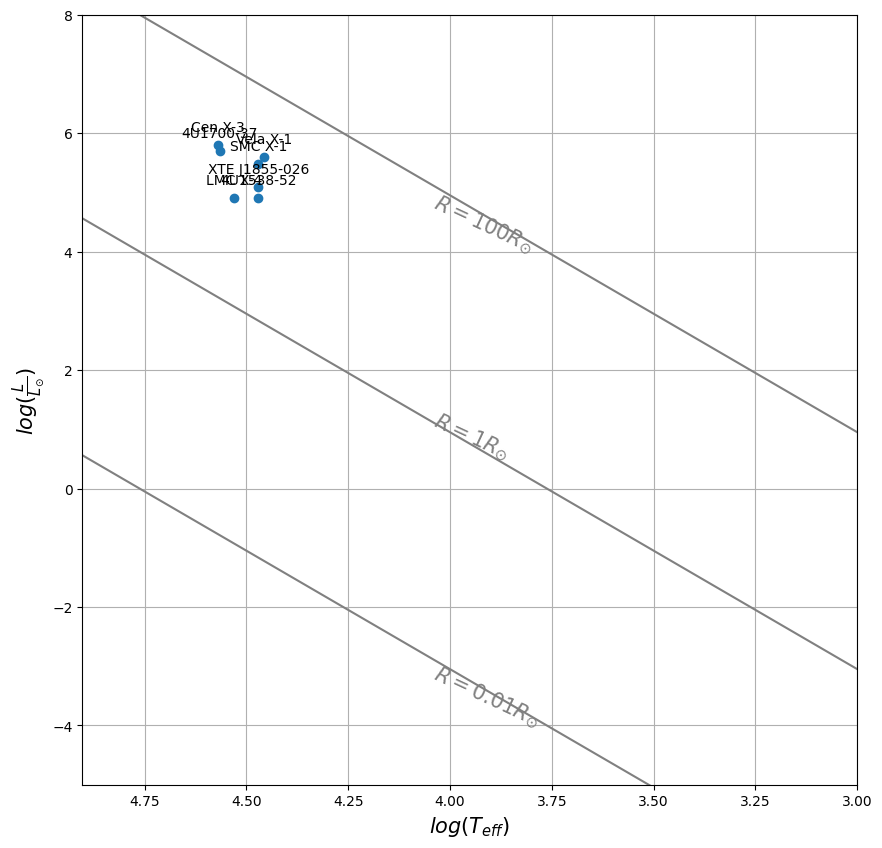

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df_AllParameters["logTeff"], df_AllParameters["logL_true/L_sun"])
plt.ylim(-5, 8)
plt.xlim(np.log10(80000),np.log10(1000))
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)

def L(Teff, R):
    # Some constants
    sigma = 5.67e-8 # W m-2 k-4
    Rsun = 696340000 # m
    Lsun = 3.86e26 # W

    return np.log10((4 * np.pi * sigma * Rsun**2) / Lsun) + 2 * np.log10(R) + 4 * np.log10(Teff)

radii = [0.01, 1, 100] # Solar radii
T_cR = [10**3, 10**5]
log_T_cR = [3, 5]
L_cR = []

for R in radii:
    save = []
    for T in T_cR:
        save.append(L(T, R))
    L_cR.append(save)

for L in L_cR:
    plt.plot(log_T_cR, L, color='grey')

for i, label in enumerate(df_AllParameters["id"].tolist()):
    plt.annotate(label, (df_AllParameters["logTeff"].tolist()[i], df_AllParameters["logL_true/L_sun"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add text with radii to lines
plt.text(4.05, 4, s=r'$R = 100R_{\odot}$', rotation=-25, fontsize=15, color='grey')
plt.text(4.05, 0.5, s=r'$R = 1R_{\odot}$', rotation=-25, fontsize=15, color='grey')
plt.text(4.05, -4, s=r'$R = 0.01R_{\odot}$', rotation=-25, fontsize=15, color='grey')

plt.grid(True)
plt.show()